In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec



C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import scipy.stats

In [3]:
import os
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

In [4]:
os.chdir('C:/Users/tamee/Downloads/')

b1= pd.read_csv('SAI_s6_8miroc.csv')
#b1= (b1 - b1.mean())/b1.std()
b1=np.mean(b1,axis=1)

In [5]:

ds1 = xr.open_dataset('zg_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_185001-201412.nc')
hgt = ds1.zg.sel(lat=slice(-9.87,87.88), lon=slice(182.5, 360),plev=slice(6) ,time=slice('1979-01-01','2014-12-31'))
lat_zg = ds1.lat.sel(lat=slice(-9.86,87.88))
lon_zg = ds1.lon.sel(lon=slice(182.5, 360))

C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:
hgt2d = hgt.values
ntime,nlevel, nrow_zg, ncol_zg = hgt2d.shape
print(nrow_zg,ncol_zg)

36 63


In [7]:
#os.chdir("C:/Users/tamee/Downloads/Zg/MIROC/zg")
a= pd.read_csv("z_anom_miroc.csv")
#os.chdir("C:/Users/tamee/Downloads/Zg/MIROC")
#b=pd.read_csv('precip_miroc_anom.csv')
a= a.drop(['Unnamed: 0'],axis=1)
#b= np.mean(b,axis=1)

In [8]:
#a= a.drop(['Unnamed: 0'],axis=1)

a_t= a.T

In [10]:
from scipy import signal

In [11]:
a_zg = PCA(n_components=9)
a_zg.fit(a_t)
a_reduced= a_zg.transform(a_t)
a_reduced= signal.detrend(a_reduced, axis=0, type='linear')
zg_f=a_zg.inverse_transform(a_reduced)
print(a_zg.explained_variance_ratio_.sum())

0.8499725922022233


In [31]:
eofs = a_zg.components_

In [44]:
eofs = a_zg.components_
eofs_updated = signal.detrend(eofs, axis=0, type='linear')
year= np.arange(1, 37)   # [1 2 3 ... 36]

In [39]:
year= np.arange(1, 37)   # [1 2 3 ... 36]


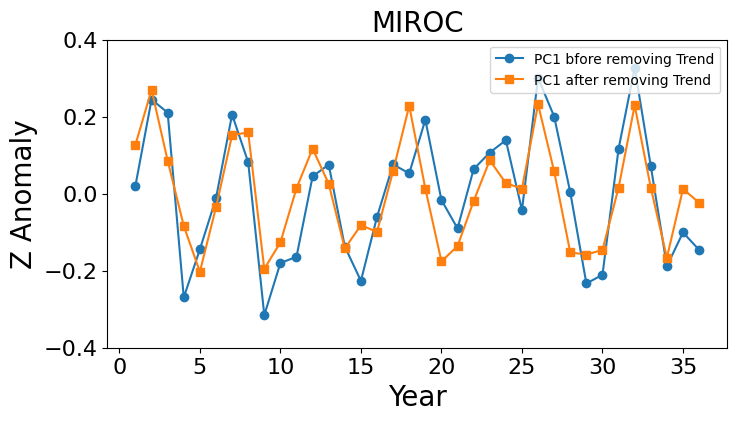

In [49]:
plt.figure(figsize=(8,4))
plt.plot(year, eofs[0], marker='o', label='PC1 bfore removing Trend')
plt.plot(year, eofs_updated[0], marker='s', label='PC1 after removing Trend')
plt.ylim(-0.4,0.4)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Z Anomaly",fontsize=20)
plt.title("MIROC",fontsize=20)
plt.legend()
plt.legend(loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=16) 
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('ts_miroc.png',dpi=300, bbox_inches="tight")

In [12]:
rp= np.reshape(zg_f,(nrow_zg,ncol_zg,36),order='F')
range(rp.shape[0])

range(0, 36)

In [13]:
cor_miroc= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_miroc[:] = np.nan
cor_miroc_p= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_miroc_p[:] = np.nan

In [14]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_miroc[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[0]
        
        
        

In [15]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_miroc_p[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[1]
        

In [16]:
miroc_sign= np.zeros([36,63])

In [17]:
for i in range(miroc_sign.shape[0]):
    for j in range(miroc_sign.shape[1]):
        if cor_miroc_p[i,j]<0.1:
            miroc_sign[i,j]= miroc_sign[i,j]+1
        else:
            miroc_sign[i,j]= miroc_sign[i,j]+0

In [18]:
y,x=np.where(miroc_sign>0)


In [19]:
x_list1= x.tolist()
y_list1=y.tolist()
lat_np= lat_zg.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon_zg.to_numpy()
lon_ls= lon_np.tolist()

In [20]:
lat_list1= []
for values in list(range(len(y_list1))):
    lat_list1.append(lat_ls[y_list1[values]])
    

In [21]:
lon_list1= []
for values in list(range(len(x_list1))):
    lon_list1.append(lon_ls[x_list1[values]])

In [22]:
lat_list1

[40.46364817811504,
 43.25419466535094,
 46.04472663110168,
 46.04472663110168,
 46.04472663110168,
 46.04472663110168,
 46.04472663110168,
 48.83524096625059,
 51.62573367493825,
 51.62573367493825,
 57.206631527643246,
 57.206631527643246,
 57.206631527643246,
 57.206631527643246,
 57.206631527643246,
 59.997020108491306,
 59.997020108491306,
 59.997020108491306,
 62.787351798963066,
 62.787351798963066,
 62.787351798963066,
 62.787351798963066,
 62.787351798963066,
 62.787351798963066,
 62.787351798963066,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 65.57760701082782,
 68.36775610831317,
 68.36775610831317,
 68.3

In [23]:
cor_miroc.max()

0.5248391248391249

In [25]:
def to_float(arr):
    # fast path if already numeric
    if isinstance(arr, np.ndarray) and np.issubdtype(arr.dtype, np.number):
        return arr.astype(np.float64, copy=False)
    # attempt robust conversion (handles lists / mixed types)
    return np.array(arr, dtype=np.float64)

In [26]:
cor_miroc= to_float(cor_miroc)

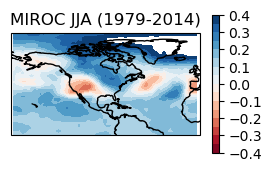

In [28]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1, hspace=0.15)

ax2 = fig.add_subplot(gs[0,1],  projection=ccrs.PlateCarree())
x1, y1 = np.meshgrid(lon_zg, lat_zg)
level= np.arange(-0.4,0.45,0.05)
cs = ax2.contourf(x1, y1, cor_miroc,level,
                        
                        transform=ccrs.PlateCarree(),
                        cmap='RdBu')
    
cb=fig.colorbar(cs, ax=ax2, shrink=0.8, aspect=20)  
#ax2.scatter(lon_list1,lat_list1,marker='o', color='tab:red')
ax2.coastlines()
ax2.set_global()
ax2.set_extent([-180,0,-7.5,90],crs=ccrs.PlateCarree())
ax2.set_title('MIROC JJA (1979-2014)')
#ax2.add_patch(rect)
fig.savefig('basin_mpi')

C:\Users\tamee\AppData\Local\Temp\ipykernel_13792\2121508468.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  m.plot(lon_list1,lat_list1,'bo',markersize=1,color='k')


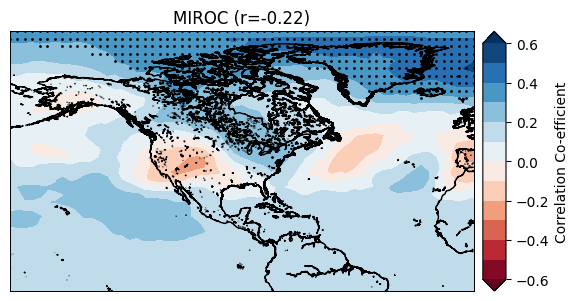

In [34]:
m = Basemap(projection='cyl', llcrnrlon=min(lon_zg), llcrnrlat=min(lat_zg),
        urcrnrlon=max(lon_zg), urcrnrlat=max(lat_zg),resolution='h')

x, y = m(*np.meshgrid(lon_zg,lat_zg))

cs = m.contourf(x,y,cor_miroc,np.arange(-0.6,0.7,0.1), cmap='RdBu',extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=1,color='k')
m.drawcoastlines()
#m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('Correlation Co-efficient')
plt.title('MIROC (r=-0.22)')

os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('PCA_MIROC_trend_removed.png')

In [30]:
np.max(cor_miroc)

0.5122265122265123

In [29]:
from scipy.interpolate import RegularGridInterpolator
os.chdir("C:/Users/tamee/Downloads/")
ds1 = xr.open_dataset('hgt.mon.mean.nc')
hgt = ds1.hgt.sel(lat=slice(90,-7.5), lon=slice(182.5, 360),level=slice(6) ,time=slice('1979-01-01','2014-12-31'))
lat_cpc = ds1.lat.sel(lat=slice(90, -7.5))
lon_cpc = ds1.lon.sel(lon=slice(182.5, 360))
os.chdir("C:/Users/tamee/Downloads/review figures/")


cpc = np.loadtxt("cor_cpc.txt")  
fA = RegularGridInterpolator((lat_zg, lon_zg), cor_miroc, bounds_error=False, fill_value=np.nan)
LATB, LONB = np.meshgrid(lat_cpc, lon_cpc, indexing='ij')  # (nlatB, nlonB)
pts = np.column_stack((LATB.ravel(), LONB.ravel()))
A_on_B = fA(pts).reshape(LATB.shape)
mask = np.isfinite(A_on_B) & np.isfinite(cpc)
r = np.corrcoef(A_on_B[mask].ravel(), cpc[mask].ravel())[0, 1]
r

-0.22029303441396147